In [170]:
import pandas as pd
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import colors
import glob
import seaborn as sns
max_diffuse_nsb_std = 2.3

start_date_2019 = datetime.strptime("2019-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2019 = datetime.strptime("2019-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
    
start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

colors = [
	'#8fbbda', # Pastel Blue
	'#ffbf86', # Pastel Orange
	'#96d096', # Pastel Green
	'#eb9393', # Pastel Red
	'#cab3de', # Pastel Purple
	'#f1bbe0', # Pastel Pink
	'#c6aba5', # Pastel Brown 
]

In [6]:
datacheck_files = glob.glob('/Users/vdk/muons2024/v0.9-v0.10/20*/DL1_datacheck_*.h5')
datacheck_files.sort()

runsummary = []
cosmics = []
cis = []
for file in datacheck_files:
    try:
        runsummary.append(pd.read_hdf(file, 'runsummary'))
        cosmics.append(pd.read_hdf(file, 'cosmics'))
        cis.append(pd.read_hdf(file, 'cosmics_intensity_spectrum'))
    except:
        print(file)
    
cosmics_pd = pd.concat(cosmics, ignore_index=True)
runsummary_pd = pd.concat(runsummary, ignore_index=True)
cis_pd = pd.concat(cis, ignore_index=True)
cosmics_pd.columns

/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221217.h5
/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221218.h5
/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221219.h5


Index(['runnumber', 'subrun', 'time', 'elapsed_time', 'events', 'azimuth',
       'altitude', 'wrong_ucts_trig_type', 'wrong_tib_trig_type',
       'unknown_ucts_trig_type', 'unknown_tib_trig_type', 'num_ucts_jumps',
       'num_contained_mu_rings', 'mu_effi_mean', 'mu_effi_stddev',
       'mu_width_mean', 'mu_width_stddev', 'mu_radius_mean',
       'mu_radius_stddev', 'mu_intensity_mean', 'mu_hg_peak_sample',
       'mu_hg_peak_sample_stddev', 'fraction_pulses_above10',
       'fraction_pulses_above30'],
      dtype='object')

#### Only low NSB runs

In [13]:
low_nsb_runs = cis_pd[['yyyymmdd','runnumber', 'subrun']][(cis_pd['diffuse_nsb_std'] <= max_diffuse_nsb_std)]
low_nsb_runsummary = runsummary_pd[runsummary_pd['runnumber'].isin(low_nsb_runs['runnumber'])]
low_nsb_cosmics = cosmics_pd[cosmics_pd['runnumber'].isin(low_nsb_runs['runnumber'])]
low_nsb_cosmics

,runnumber,subrun,time,elapsed_time,events,azimuth,altitude,wrong_ucts_trig_type,wrong_tib_trig_type,unknown_ucts_trig_type,...,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_radius_mean,mu_radius_stddev,mu_intensity_mean,mu_hg_peak_sample,mu_hg_peak_sample_stddev,fraction_pulses_above10,fraction_pulses_above30
0,1615,0,1.574552e+09,24.100643,50637,4.604371,1.071770,0.0,10.0,50637,...,0.010725,0.062351,0.017688,1.070335,0.099711,2313.711426,12.662162,1.037344,0.010618,0.002622
1,1615,1,1.574552e+09,24.087356,50634,4.607692,1.067383,0.0,8.0,50634,...,0.013619,0.066789,0.017587,1.046328,0.108055,2315.158691,13.393939,1.507711,0.010700,0.002738
2,1615,2,1.574552e+09,24.476276,50605,4.608190,1.066719,0.0,10.0,50605,...,0.015461,0.064313,0.020475,1.083877,0.105996,2343.243164,12.847222,1.285452,0.010981,0.002713
3,1615,3,1.574553e+09,24.035344,50645,4.609890,1.064421,0.0,10.0,50645,...,0.013594,0.064370,0.026010,1.050182,0.115174,2297.864502,13.094595,1.346420,0.010611,0.002712
4,1615,4,1.574553e+09,25.515290,50630,4.610365,1.063804,0.0,9.0,50630,...,0.013783,0.062570,0.015944,1.088282,0.101900,2372.299072,12.847222,1.589222,0.010605,0.002699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790755,16897,4,1.709166e+09,119.236720,36080,1.248052,0.800884,0.0,0.0,0,...,0.009036,0.126604,0.015442,1.146832,0.102177,1323.607422,11.375000,1.500000,0.030590,0.004015
790756,16897,5,1.709166e+09,150.845175,29721,1.249751,0.808214,0.0,0.0,0,...,0.011334,0.122119,0.021165,1.087885,0.053706,1298.256470,10.666667,1.775251,0.037174,0.004128
790757,16897,6,1.709167e+09,176.522166,24594,1.252201,0.818946,0.0,0.0,0,...,NaN,0.111994,NaN,1.200372,NaN,1388.520020,4.000000,NaN,0.042609,0.005328
790758,16897,7,1.709167e+09,177.568846,24384,1.254610,0.829748,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025073,0.005885


#### Only high NSB runs

In [8]:
high_nsb_runs = cis_pd[['yyyymmdd','runnumber', 'subrun']][(cis_pd['diffuse_nsb_std'] > max_diffuse_nsb_std)]
high_nsb_runsummary = runsummary_pd[runsummary_pd['runnumber'].isin(high_nsb_runs['runnumber'])]
high_nsb_cosmics = cosmics_pd[cosmics_pd['runnumber'].isin(high_nsb_runs['runnumber'])]
high_nsb_runsummary

,runnumber,time,elapsed_time,min_altitude,mean_altitude,max_altitude,min_azimuth,max_azimuth,mean_azimuth,mean_ra,...,cosmics_fraction_pulses_above10,cosmics_fraction_pulses_above30,mu_effi_mean,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_hg_peak_sample_mean,mu_hg_peak_sample_stddev,mu_intensity_mean,mean_number_of_pixels_nearby_stars
8,1626,1.574638e+09,950.041318,0.749771,0.779848,0.808919,1.503909,1.532924,1.518539,86.634101,...,0.013519,0.002208,0.185967,0.016964,0.065150,0.019810,15.397387,2.763028,2315.215088,167.000000
29,1792,1.579123e+09,244.938722,0.928062,0.931323,0.934556,0.428313,0.438660,0.433499,83.286474,...,0.002866,0.000461,0.184386,0.015131,0.062220,0.019020,14.745975,3.776443,2384.742920,50.750000
30,1793,1.579123e+09,663.296811,0.938579,0.946882,0.955010,0.391529,0.421604,0.406771,83.293810,...,0.008654,0.001657,0.185755,0.017313,0.062870,0.020318,14.578471,3.961234,2365.828857,50.704545
31,1794,1.579124e+09,332.241263,0.972077,0.975644,0.979069,0.337438,0.354710,0.346031,83.300907,...,0.009720,0.001658,0.184603,0.016270,0.061785,0.019590,15.239130,3.851621,2372.605957,47.304348
32,1795,1.579126e+09,186.424407,1.295967,1.301115,1.306330,1.946692,1.968108,1.957196,83.633906,...,0.008913,0.001627,0.191840,0.019727,0.068873,0.021797,14.860140,3.658546,2363.152832,197.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,16867,1.708316e+09,1181.796643,0.867558,0.884424,0.907150,-0.582058,-0.545851,5.715662,155.474727,...,0.008525,0.000992,0.168363,0.015399,0.080658,0.021940,16.154879,1.716163,1929.150024,51.547619
7940,16876,1.708324e+09,936.330718,1.174209,1.192121,1.209119,2.433646,2.588484,2.509379,238.935816,...,0.004750,0.000826,0.161381,0.013719,0.067751,0.019744,15.353191,1.525731,2022.317383,2.310680
7948,16895,1.709164e+09,1189.534480,0.617381,0.649953,0.683811,1.206617,1.226851,1.216676,198.074740,...,0.044832,0.002684,0.153658,0.018436,0.130765,0.025792,11.787273,1.294595,1349.975220,13.571429
7949,16896,1.709165e+09,1181.681148,0.704191,0.737945,0.770792,1.232727,1.250689,1.241980,197.130777,...,0.034031,0.002960,0.138740,0.012120,0.127006,0.020600,11.700397,1.563602,1320.588379,3.500000


#### Evolution of parameters

In [158]:
# Define the years and their corresponding start and end dates
years = {
    2019: (start_date_2019, end_date_2019),
    2020: (start_date_2020, end_date_2020),
    2021: (start_date_2021, end_date_2021),
    2022: (start_date_2022, end_date_2022),
    2023: (start_date_2023, end_date_2023),
    2024: (start_date_2024, end_date_2024)
}

# Initialize dictionaries to store results
mu_eff_mean = {}
mu_eff_std = {}
mu_intensity_mean = {}
mu_width_mean = {}
mu_width_std = {}
mu_radius_mean = {}
mu_radius_std = {}
runs = {}

# Iterate over the years and calculate the required statistics
for year, (start_date, end_date) in years.items():
    mask = (low_nsb_runsummary['time'] > start_date) & (low_nsb_runsummary['time'] < end_date)
    mu_eff_mean[year] = low_nsb_runsummary['mu_effi_mean'][mask]
    mu_eff_std[year] = low_nsb_runsummary['mu_effi_stddev'][mask]
    mu_intensity_mean[year] = low_nsb_runsummary['mu_intensity_mean'][mask]
    mu_width_mean[year] = low_nsb_runsummary['mu_width_mean'][mask]
    mu_width_std[year] = low_nsb_runsummary['mu_width_stddev'][mask]
    runs[year] = low_nsb_runsummary['runnumber'][mask]

    mask_cosmics = (low_nsb_cosmics['time'] > start_date) & (low_nsb_cosmics['time'] < end_date)
    mu_radius_mean[year] = low_nsb_cosmics['mu_radius_mean'][mask_cosmics]
    mu_radius_std[year] = low_nsb_cosmics['mu_radius_stddev'][mask_cosmics]

# Print the results rounded to three decimal places
for year in years.keys():
    mean_eff = round(np.mean(mu_eff_mean[year]), 3)
    std_eff = round(np.mean(mu_eff_std[year]), 3)
    mean_intensity = round(np.mean(mu_intensity_mean[year]), 3)
    mean_width = round(np.mean(mu_width_mean[year]), 3)
    std_width = round(np.mean(mu_width_std[year]), 3)
    mean_radius = round(np.mean(mu_radius_mean[year]), 3)
    std_radius = round(np.mean(mu_radius_std[year]), 3)
    
    print(f"===============YEAR {year}==========================\n")
    print(f"Mean opt eff for {year} year = {mean_eff} with std = {std_eff}")
    print(f"Mean ring size for {year} year = {mean_intensity}")
    print(f"Mean width for {year} year = {mean_width} with std = {std_width}")
    print(f"Mean radius for {year} year = {mean_radius} & {std_radius}")
    print("\n==================================================\n")

===============YEAR 2019==========================

Mean opt eff for 2019 year = 0.188 with std = 0.017
Mean ring size for 2019 year = 2326.368
Mean width for 2019 year = 0.066 with std = 0.02
Mean radius for 2019 year = 1.07 & 0.105


===============YEAR 2020==========================

Mean opt eff for 2020 year = 0.17 with std = 0.015
Mean ring size for 2020 year = 2080.422
Mean width for 2020 year = 0.068 with std = 0.021
Mean radius for 2020 year = 1.069 & 0.105


===============YEAR 2021==========================

Mean opt eff for 2021 year = 0.165 with std = 0.015
Mean ring size for 2021 year = 2064.325
Mean width for 2021 year = 0.069 with std = 0.02
Mean radius for 2021 year = 1.072 & 0.104


===============YEAR 2022==========================

Mean opt eff for 2022 year = 0.166 with std = 0.014
Mean ring size for 2022 year = 2050.868
Mean width for 2022 year = 0.072 with std = 0.02
Mean radius for 2022 year = 1.077 & 0.104


===============YEAR 2023==========================

M

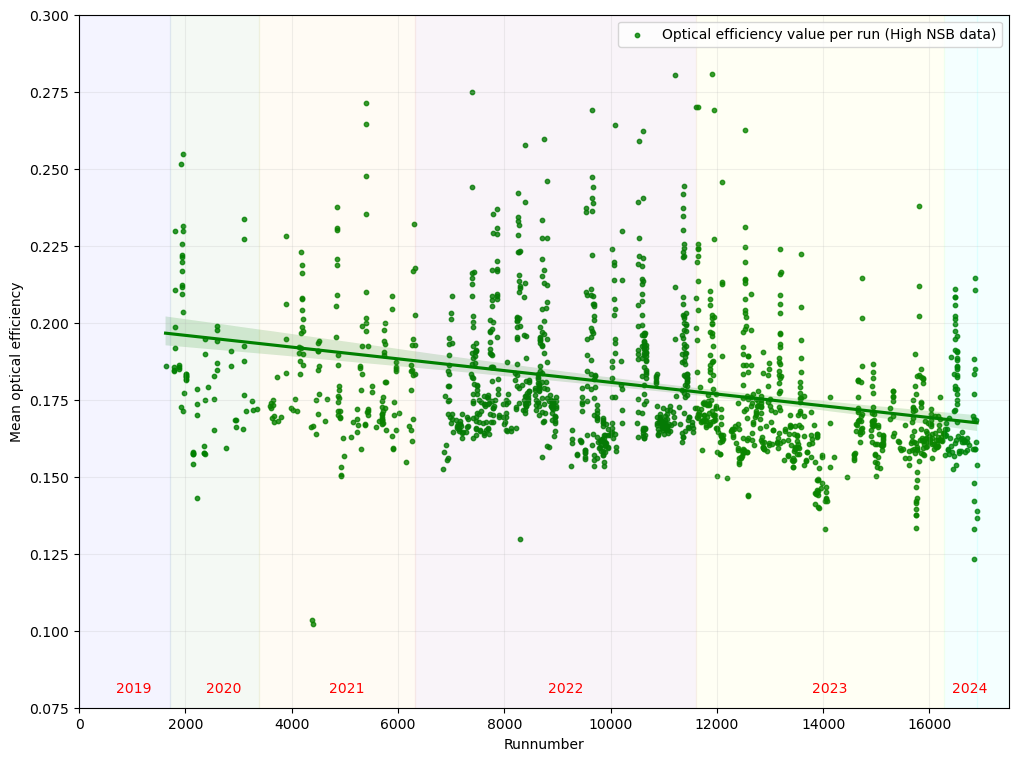

In [78]:
# Initialize the plot
colors_background = ['blue', 'green', 'orange', 'purple', 'yellow', 'cyan']
ytext = 0.08
plt.figure(figsize=(12, 9))
#sns.regplot(x=low_nsb_runsummary['runnumber'], y=low_nsb_runsummary['mu_effi_mean'], color='k', scatter_kws={'s': 10}, label = 'Optical efficiency value per run (Low NSB data)')
sns.regplot(x=high_nsb_runsummary['runnumber'], y=high_nsb_runsummary['mu_effi_mean'], color='g', scatter_kws={'s': 10}, label = 'Optical efficiency value per run (High NSB data)')
#sns.regplot(x=runsummary_pd['runnumber'], y=runsummary_pd['mu_effi_mean'], color='g', scatter_kws={'s': 10})

# Use a loop to fill between the run number ranges for each year
x1 = 0
for idx, (year, runs_year) in enumerate(runs.items()):
    x2 = max(runs_year)
    plt.fill_betweenx(y=[0, 0.3], x1=x1, x2=x2, color=colors_background[idx], alpha=0.045)
    plt.annotate(str(year), (((x1 + x2) / 2)-150, ytext), c='red')
    x1 = x2

plt.fill_betweenx(y=[0, 0.3], x1=max(runs[2024]), x2=20000, color=colors_background[idx], alpha=0.045)
plt.grid(alpha=0.2)
plt.ylim(0.075, 0.3)
plt.xlim(0, 17500)
plt.legend()
plt.xlabel('Runnumber')
plt.ylabel('Mean optical efficiency')
#plt.savefig('/Users/vdk/Software/code/muon_paper_2024/figures/OpticalEfficiencyEvolutionHighNSB.pdf', dpi=200, format='pdf', bbox_inches='tight')

plt.show()

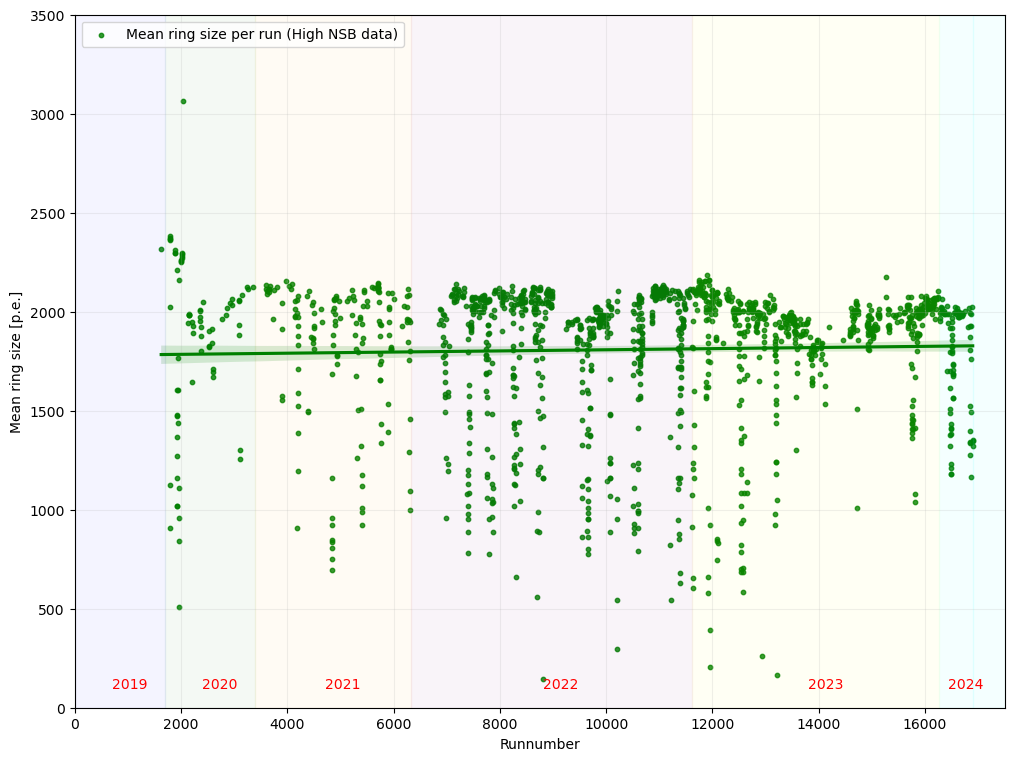

In [117]:
# Initialize the plot
colors_background = ['blue', 'green', 'orange', 'purple', 'yellow', 'cyan']
ytext = 100
plt.figure(figsize=(12, 9))
#sns.regplot(x=low_nsb_runsummary['runnumber'], y=low_nsb_runsummary['mu_intensity_mean'], color='k', scatter_kws={'s': 10}, label = 'Mean ring size per run (Low NSB data)')
sns.regplot(x=high_nsb_runsummary['runnumber'], y=high_nsb_runsummary['mu_intensity_mean'], color='g', scatter_kws={'s': 10}, label = 'Mean ring size per run (High NSB data)')
#sns.regplot(x=runsummary_pd['runnumber'], y=runsummary_pd['mu_effi_mean'], color='g', scatter_kws={'s': 10})

# Use a loop to fill between the run number ranges for each year
x1 = 0
for idx, (year, runs_year) in enumerate(runs.items()):
    x2 = max(runs_year)
    plt.fill_betweenx(y=[0, 4000], x1=x1, x2=x2, color=colors_background[idx], alpha=0.045)
    plt.annotate(str(year), (((x1 + x2) / 2)-150, ytext), c='red')
    x1 = x2

plt.fill_betweenx(y=[0,3500], x1=max(runs[2024]), x2=20000, color=colors_background[idx], alpha=0.045)
plt.grid(alpha=0.2)
plt.ylim(0, 3500)
plt.xlim(0, 17500)
plt.legend(loc='upper left')
plt.xlabel('Runnumber')
plt.ylabel('Mean ring size [p.e.]')
#plt.savefig('/Users/vdk/Software/code/muon_paper_2024/figures/RingSizeEvolutionHighNSB.pdf', dpi=200, format='pdf', bbox_inches='tight')

plt.show()

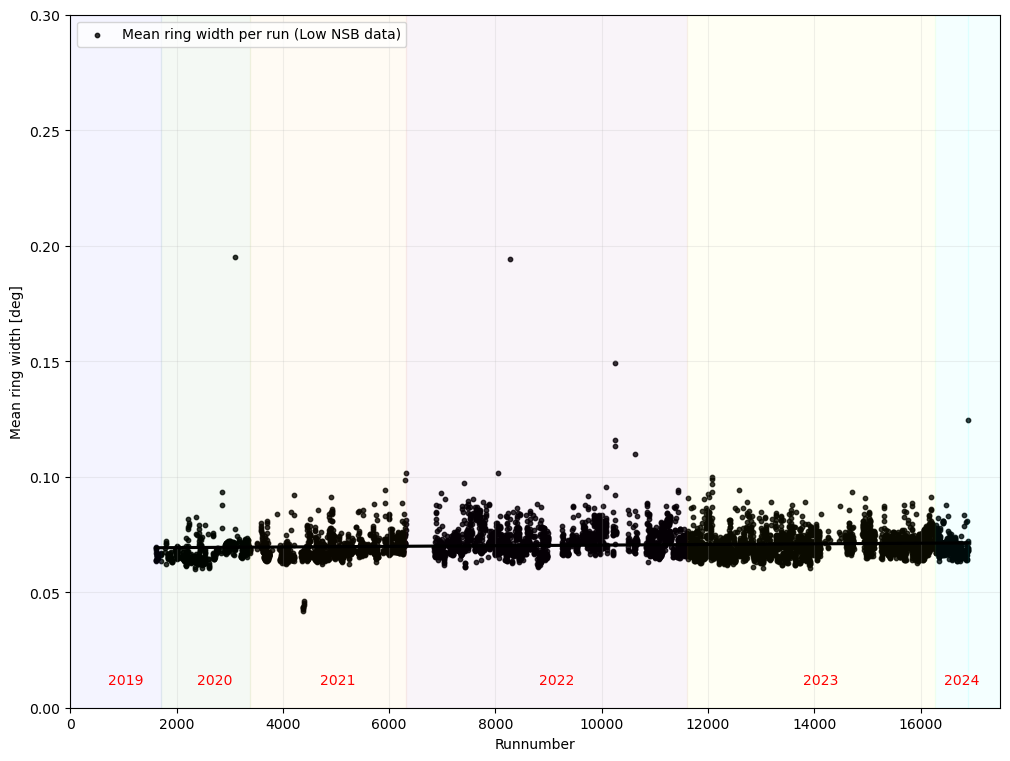

In [128]:
# Initialize the plot
colors_background = ['blue', 'green', 'orange', 'purple', 'yellow', 'cyan']
ytext = 0.01
upper_bound = 0.3
lower_bound = 0
plt.figure(figsize=(12, 9))
sns.regplot(x=low_nsb_runsummary['runnumber'], y=low_nsb_runsummary['mu_width_mean'], color='k', scatter_kws={'s': 10}, label = 'Mean ring width per run (Low NSB data)',)# x_bins = 400)
#sns.regplot(x=high_nsb_runsummary['runnumber'], y=high_nsb_runsummary['mu_width_mean'], color='g', scatter_kws={'s': 10}, label = 'Mean ring width per run (High NSB data)')#, x_bins = 400)
#sns.regplot(x=runsummary_pd['runnumber'], y=runsummary_pd['mu_effi_mean'], color='g', scatter_kws={'s': 10})

# Use a loop to fill between the run number ranges for each year
x1 = 0
for idx, (year, runs_year) in enumerate(runs.items()):
    x2 = max(runs_year)
    plt.fill_betweenx(y=[0, upper_bound], x1=x1, x2=x2, color=colors_background[idx], alpha=0.045)
    plt.annotate(str(year), (((x1 + x2) / 2)-150, ytext), c='red')
    x1 = x2

plt.fill_betweenx(y=[0,upper_bound], x1=max(runs[2024]), x2=20000, color=colors_background[idx], alpha=0.045)
plt.grid(alpha=0.2)
plt.ylim(0, upper_bound)
plt.xlim(0, 17500)
plt.legend(loc='upper left')
plt.xlabel('Runnumber')
plt.ylabel('Mean ring width [deg]')
#plt.savefig('/Users/vdk/Software/code/muon_paper_2024/figures/RingWidthEvolutionLowNSB.pdf', dpi=200, format='pdf', bbox_inches='tight')

plt.show()

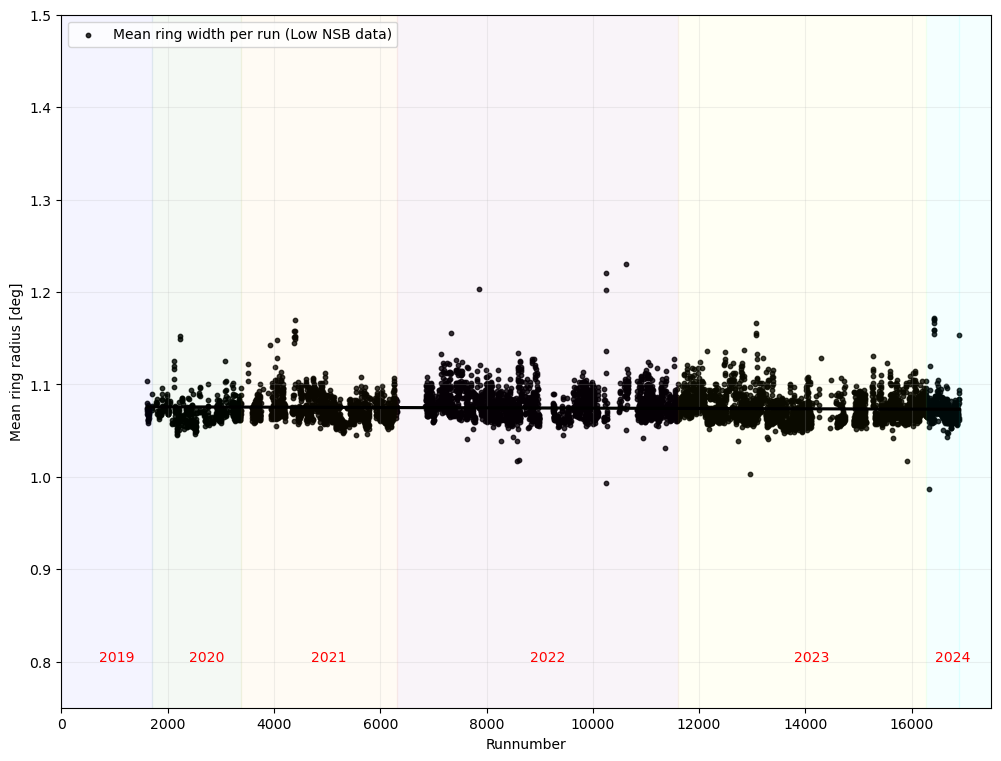

In [211]:
# Initialize the plot
colors_background = ['blue', 'green', 'orange', 'purple', 'yellow', 'cyan']
ytext = 0.8
upper_bound = 1.5
lower_bound = 0.75

grouped_subruns_low = low_nsb_cosmics.groupby(['runnumber', 'subrun'])['mu_radius_mean'].mean().reset_index()
grouped_subruns_high = high_nsb_cosmics.groupby(['runnumber', 'subrun'])['mu_radius_mean'].mean().reset_index()

# Step 2: Group by 'runnumber' again to get the mean radius over all subruns for each runnumber
mean_radius_per_runnumber_low = grouped_subruns_low.groupby('runnumber')['mu_radius_mean'].mean().reset_index()
mean_radius_per_runnumber_high = grouped_subruns_high.groupby('runnumber')['mu_radius_mean'].mean().reset_index()

plt.figure(figsize=(12, 9))
sns.regplot(x=mean_radius_per_runnumber_low['runnumber'], y=mean_radius_per_runnumber_low['mu_radius_mean'], color='k', scatter_kws={'s': 10}, label = 'Mean ring width per run (Low NSB data)',)# x_bins = 400)
#sns.regplot(x=mean_radius_per_runnumber_high['runnumber'], y=mean_radius_per_runnumber_high['mu_radius_mean'], color='g', scatter_kws={'s': 10}, label = 'Mean ring width per run (High NSB data)')#, x_bins = 400)
#sns.regplot(x=runsummary_pd['runnumber'], y=runsummary_pd['mu_effi_mean'], color='g', scatter_kws={'s': 10})

# Use a loop to fill between the run number ranges for each year
x1 = 0
for idx, (year, runs_year) in enumerate(runs.items()):
    x2 = max(runs_year)
    plt.fill_betweenx(y=[0, upper_bound], x1=x1, x2=x2, color=colors_background[idx], alpha=0.045)
    plt.annotate(str(year), (((x1 + x2) / 2)-150, ytext), c='red')
    x1 = x2

plt.fill_betweenx(y=[0,upper_bound], x1=max(runs[2024]), x2=20000, color=colors_background[idx], alpha=0.045)
plt.grid(alpha=0.2)
plt.ylim(lower_bound, upper_bound)
plt.xlim(0, 17500)
plt.legend(loc='upper left')
plt.xlabel('Runnumber')
plt.ylabel('Mean ring radius [deg]')
#plt.savefig('/Users/vdk/Software/code/muon_paper_2024/figures/RingRadiusEvolutionLowNSB.pdf', dpi=200, format='pdf', bbox_inches='tight')

plt.show()

#### MC to DATA

In [176]:
size_outside = 500
ring_size_upper = 10000
ring_completeness_cut = 0.9
ring_containment_cut = 0.9
bin_number = 8

start_date_2019 = datetime.strptime("2019-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2019 = datetime.strptime("2019-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()


colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#e377c2',  # raspberry yogurt pink
    '#8c564b',  # chestnut brown
]

def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        ax.set_ylim(0.042,0.14)
        ax.set_xlim(1.0,1.25)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(2000,4000)
        ax2.set_xlim(1.0,1.25)

In [189]:
muon_file = '/Users/vdk/muons2024/highNSB_fits_filtered.csv'
df_all_data = pd.read_csv(muon_file, na_values=['NA', '?'])
df_good_data_real_high_nsb = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['size_outside'] < 500)]
del(df_all_data)

In [169]:


muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real_low_nsb = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['size_outside'] < 500)]
del(df_all_data)
df_good_data_real_low_nsb

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_29915/926676089.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_29915/926676089.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_29915/926676089.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_29915/926676089.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import o

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,60.0,1.574637e+09,-1.0,2311.1147,0.000000,-0.975512,-0.354570,1.038939,0.066076,1.0,...,6.481509,6.331281,1.387386,0.059634,-0.111103,0.311915,371.0,0.039351,13.0,0.0
1,287.0,1.574637e+09,-1.0,2646.7896,0.000000,0.353987,0.463572,1.192394,0.039972,1.0,...,6.638931,0.768292,6.594326,0.042449,0.208130,0.457135,493.0,0.104818,15.0,0.0
2,815.0,1.574637e+09,-1.0,2682.9595,0.000000,0.200454,0.503540,1.155244,0.050399,1.0,...,5.826689,5.821747,-0.239914,0.049087,0.312026,0.410487,478.0,0.048045,17.0,0.0
3,1248.0,1.574637e+09,-1.0,2802.3580,0.000000,0.719930,0.076793,1.203815,0.034111,1.0,...,4.560473,1.679653,4.239891,0.038754,0.229592,0.123887,499.0,0.371614,19.0,0.0
4,1573.0,1.574637e+09,-1.0,2121.7700,0.000000,-0.878445,0.215899,1.024937,0.093730,1.0,...,8.680637,-3.656715,-7.872858,0.077182,-0.073894,0.545917,358.0,0.000755,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26357613,5055075.0,1.674713e+09,-1.0,1242.5120,0.000000,-1.224233,2.159202,1.161522,0.080167,True,...,6.374878,-0.132690,6.373497,0.069734,-1.031511,0.640002,182.0,0.277134,10.0,0.0
26357614,5055159.0,1.674713e+09,-1.0,2182.8315,0.000000,0.045469,-0.660867,1.009607,0.071180,True,...,5.291778,5.289639,-0.150436,0.062548,-0.373700,0.266113,353.0,0.320824,10.0,0.0
26357615,5055180.0,1.674713e+09,-1.0,2119.8528,81.346530,0.501732,0.109346,0.891445,0.089546,True,...,5.857258,5.855136,-0.157671,0.092540,-0.898507,0.739353,274.0,0.804299,12.0,0.0
26357616,5056311.0,1.674713e+09,-1.0,1821.9410,6.692784,-0.431301,0.734208,0.981532,0.112360,True,...,9.194141,5.191974,-7.587862,0.091770,-0.250212,-0.288611,327.0,0.404962,12.0,0.0


In [171]:
listdir_z0_cta1 = glob.glob("/Users/vdk/muons2024/lapalma_simulations/cta-config/fit_valid/tables/*")
listdir_z0_cta2 = glob.glob("/Users/vdk/muons2024/lapalma_simulations/cta-config/tables_pt2/*")

listdir_low_nsb = glob.glob("/Users/vdk/muons2024/lapalma_simulations/nsb_play/0.5/table/*")
listdir_high_nsb = glob.glob("/Users/vdk/muons2024/lapalma_simulations/nsb_play/x1.5NSB/*")
listdir_3xNSB = glob.glob("/Users/vdk/muons2024/lapalma_simulations/nsb_play/3xNSB/tables/*")

listdir_fitrandom_initial = glob.glob("/Users/vdk/muons2024/lapalma_simulations/fit_play/fit_random_initial_orig/tables/*")

listdir_perf_paper = glob.glob("/Users/vdk/muons2024/lapalma_simulations/performance_paper/tables/*")



listdir = listdir_z0_cta1+listdir_z0_cta2
dat = Table.read('{}'.format(listdir[0]), format='fits')
for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat2['good_ring'] = dat2['good_ring'].astype(bool)
    dat2['is_valid'] = dat2['is_valid'].astype(bool)
    dat2['parameters_at_limit'] = dat2['parameters_at_limit'].astype(bool)
    dat = vstack([dat, dat2])
df_2 = dat.to_pandas()
df_good_data_sim = df_2[df_2['good_ring'] & (df_2['muon_efficiency'] < 1) & (df_2['size_outside'] < size_ouside)]


df_good_data_sim


NameError: name 'df_good_dat_sim' is not defined

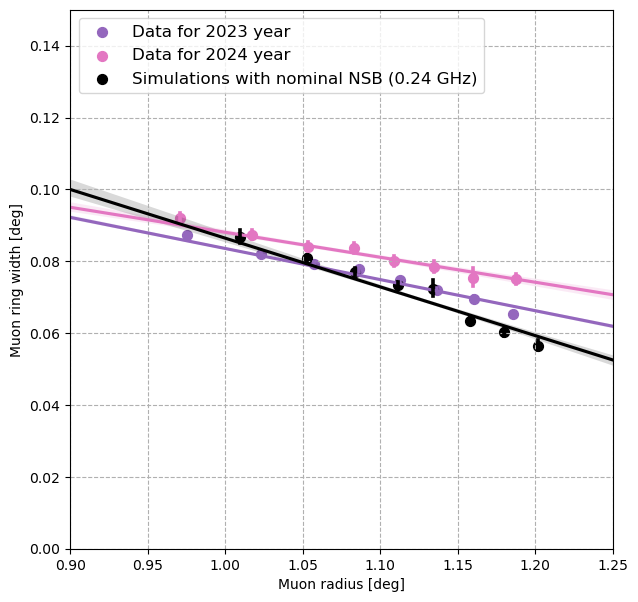

In [205]:
start_date_2019 = datetime.strptime("2019-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2019 = datetime.strptime("2019-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

ring_size_upper = 10000
ring_completeness_cut = 0.9
ring_containment_cut = 0.9
bin_number = 8


colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#e377c2',  # raspberry yogurt pink
    '#8c564b',  # chestnut brown
]

def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        ax.set_ylim(0.042,0.14)
        ax.set_xlim(1.0,1.25)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(2000,4000)
        ax2.set_xlim(1.0,1.25)

alpha_reg = 0.2

plt.figure(figsize = (7,7))

flag = '2023-24'

# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)&
#                                                  (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2019) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2019)], 
#             y = df_good_data_real_high_nsb['ring_width'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
#                                                 (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) &  
#                                                 (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                 (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)& 
#                                                 (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2019) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2019)], 
#             x_bins=bin_number, color=colors[0], label = 'Data for 2019 year', scatter_kws={'alpha': alpha_reg}, line_kws={'alpha': alpha_reg})

# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)&
#                                                  (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2020) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2020)], 
#             y = df_good_data_real_high_nsb['ring_width'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
#                                                 (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) &  
#                                                 (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                 (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)& 
#                                                 (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2020) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2020)], 
#             x_bins=bin_number, color=colors[1], label = 'Data for 2020 year', scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})

# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)&
#                                                  (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2021) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2021)], 
#             y = df_good_data_real_high_nsb['ring_width'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
#                                                 (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) &  
#                                                 (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                 (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)& 
#                                                 (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2021) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2021)], 
#             x_bins=bin_number, color=colors[2], label = 'Data for 2021 year', scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})

# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) &  
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)&
#                                                  (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2022) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2022)], 
#             y = df_good_data_real_high_nsb['ring_width'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                 (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                 (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                 (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)& 
#                                                 (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2022) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2022)], 
#             x_bins=bin_number, color=colors[3], label = 'Data for 2022 year',scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})
sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
                                                 (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
                                                 (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
                                                 (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)&
                                                 (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
                                                (df_good_data_real_high_nsb['event_time'] > start_date_2023) &
                                                (df_good_data_real_high_nsb['event_time'] < end_date_2023)], 
            y = df_good_data_real_high_nsb['ring_width'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
                                                (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) &  
                                                (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
                                                (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)& 
                                                (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
                                                (df_good_data_real_high_nsb['event_time'] > start_date_2023) &
                                                (df_good_data_real_high_nsb['event_time'] < end_date_2023)], 
            x_bins=bin_number, color=colors[4], label = 'Data for 2023 year', scatter_kws={'alpha':1}, line_kws={'alpha':1})
sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
                                                 (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
                                                 (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
                                                 (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)&
                                                 (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
                                                (df_good_data_real_high_nsb['event_time'] > start_date_2024) &
                                                (df_good_data_real_high_nsb['event_time'] < end_date_2024)], 
            y = df_good_data_real_high_nsb['ring_width'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
                                                (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
                                                (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
                                                (df_good_data_real_high_nsb['ring_size'] < ring_size_upper)& 
                                                (df_good_data_real_high_nsb['muon_efficiency'] < 1) &
                                                (df_good_data_real_high_nsb['event_time'] > start_date_2024) &
                                                (df_good_data_real_high_nsb['event_time'] < end_date_2024)], 
            x_bins=bin_number, color=colors[5], label = 'Data for 2024 year', scatter_kws={'alpha':1}, line_kws={'alpha':1})
sns.regplot(x = df_good_data_sim['ring_radius'][(df_good_data_sim['ring_completeness'] > ring_completeness_cut) & 
                                            (df_good_data_sim['ring_containment'] > ring_containment_cut) & 
                                            (df_good_data_sim['size_outside'] < size_outside) & 
                                            (df_good_data_sim['ring_size'] < ring_size_upper)  & 
                                            (df_good_data_sim['muon_efficiency'] < 1)], 
            y = df_good_data_sim['ring_width'][(df_good_data_sim['ring_completeness'] > ring_completeness_cut) &
                                           (df_good_data_sim['ring_containment'] > ring_containment_cut) &  
                                           (df_good_data_sim['size_outside'] < size_outside) & 
                                           (df_good_data_sim['ring_size'] < ring_size_upper)  & 
                                           (df_good_data_sim['muon_efficiency'] < 1)], 
            x_bins=bin_number, color='k', label = 'Simulations with nominal NSB (0.24 GHz)')





# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) &  
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2019) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2019)], 
#             y = df_good_data_real_high_nsb['ring_size'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) & 
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2019) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2019)], 
#             x_bins=bin_number, color=colors[0], label = 'Data for 2019 year', scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})

# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) &  
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2020) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2020)], 
#             y = df_good_data_real_high_nsb['ring_size'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) & 
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2020) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2020)], 
#             x_bins=bin_number, color=colors[1], label = 'Data for 2020 year',scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})

# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) &  
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2021) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2021)], 
#             y = df_good_data_real_high_nsb['ring_size'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) & 
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2021) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2021)], 
#             x_bins=bin_number, color=colors[2], label = 'Data for 2021 year',scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})

# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) &  
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2022) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2022)], 
#             y = df_good_data_real_high_nsb['ring_size'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) & 
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2022) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2022)], 
#             x_bins=bin_number, color=colors[3], label = 'Data for 2022 year',scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})
# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) &  
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) &  
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2023) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2023)], 
#             y = df_good_data_real_high_nsb['ring_size'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
#                                                (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) &  
#                                                (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) & 
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2023) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2023)], 
#             x_bins=bin_number, color=colors[4], label = 'Data for 2023 year', scatter_kws={'alpha':1}, line_kws={'alpha':1})
# sns.regplot(x = df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
#                                                  (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
#                                                  (df_good_data_real_high_nsb['size_outside'] < size_outside) &  
#                                                  (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) &
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2024) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2024)], 
#             y = df_good_data_real_high_nsb['ring_size'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) &
#                                                (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) &  
#                                                (df_good_data_real_high_nsb['size_outside'] < size_outside) & 
#                                                (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) & 
#                                                 (df_good_data_real_high_nsb['event_time'] > start_date_2024) &
#                                                 (df_good_data_real_high_nsb['event_time'] < end_date_2024)], 
#             x_bins=bin_number, color=colors[5], label = 'Data for 2024 year')

# # # sns.regplot(x = df_good_data_high_nsb['ring_radius'][(df_good_data_high_nsb['ring_completeness'] > 0.9) &
# # #                                             (df_good_data_high_nsb['ring_containment'] > ring_containment_cut) &  
# # #                                             (df_good_data_high_nsb['size_outside'] < size_outside) & 
# # #                                             (df_good_data_high_nsb['ring_size'] < ring_size_upper) & 
# # #                                             (df_good_data_high_nsb['muon_efficiency'] < 1)], 
# # #             y = df_good_data_high_nsb['ring_size'][(df_good_data_high_nsb['ring_completeness'] > 0.9) & 
# # #                                           (df_good_data_high_nsb['ring_containment'] > ring_containment_cut) & 
# # #                                           (df_good_data_high_nsb['size_outside'] < size_outside) & 
# # #                                           (df_good_data_high_nsb['ring_size'] < ring_size_upper) & 
# # #                                           (df_good_data_high_nsb['muon_efficiency'] < 1)], 
# # #             x_bins=bin_number, color='r', label = 'High NSb data')

sns.regplot(x = df_good_data_sim['ring_radius'][(df_good_data_sim['ring_completeness'] > 0.9) &
                                            (df_good_data_sim['ring_containment'] > ring_containment_cut) &  
                                            (df_good_data_sim['size_outside'] < size_outside) & 
                                            (df_good_data_sim['ring_size'] < ring_size_upper) & 
                                            (df_good_data_sim['muon_efficiency'] < 1)], 
            y = df_good_data_sim['ring_size'][(df_good_data_sim['ring_completeness'] > 0.9) & 
                                          (df_good_data_sim['ring_containment'] > ring_containment_cut) & 
                                          (df_good_data_sim['size_outside'] < size_outside) & 
                                          (df_good_data_sim['ring_size'] < ring_size_upper) & 
                                          (df_good_data_sim['muon_efficiency'] < 1)], 
            x_bins=bin_number, color='k', label = 'Simulations with nominal NSB (0.24 GHz)')

# sns.regplot(x = df_good_data_2['ring_radius'][(df_good_data_2['ring_completeness'] > 0.9) &
#                                             (df_good_data_2['ring_containment'] > ring_containment_cut) &  
#                                             (df_good_data_2['size_outside'] < size_outside) & 
#                                             (df_good_data_2['ring_size'] < ring_size_upper) & 
#                                             (df_good_data_2['muon_efficiency'] < 1)], 
#             y = df_good_data_2['ring_size'][(df_good_data_2['ring_completeness'] > 0.9) & 
#                                           (df_good_data_2['ring_containment'] > ring_containment_cut) & 
#                                           (df_good_data_2['size_outside'] < size_outside) & 
#                                           (df_good_data_2['ring_size'] < ring_size_upper) & 
#                                           (df_good_data_2['muon_efficiency'] < 1)], 
#             x_bins=bin_number, color='cyan', label = '1xNSB')


plt.xlabel('Muon radius [deg]')
plt.ylabel('Muon Size [pe]')
plt.grid(linestyle="dashed")
plt.ylim(2000,3500)
plt.xlim(0.9,1.25)

# plt.xlabel('Muon radius [deg]')
# plt.ylabel('Muon ring width [deg]')
# plt.grid(linestyle="dashed")
# plt.ylim(0.0,0.15)
# plt.xlim(0.9,1.25)

plt.legend(prop={'size': 12}, loc=2)
#plt.show()
#plt.savefig(f'/Users/vdk/Software/code/muon_paper_2024/figures/high_nsb_data_size_{flag}_NSBx1.png', dpi=200)
#plt.savefig(f'/Users/vdk/Software/code/muon_paper_2024/figures/high_nsb_data_width_{flag}_NSBx1.png', dpi=200)

In [202]:
df_good_data_real_high_nsb['ring_radius'][(df_good_data_real_high_nsb['ring_completeness'] > ring_completeness_cut) & 
                                                 (df_good_data_real_high_nsb['ring_containment'] > ring_containment_cut) & 
                                                 (df_good_data_real_high_nsb['size_outside'] < size_outside) &  
                                                 (df_good_data_real_high_nsb['ring_size'] < ring_size_upper) &
                                                (df_good_data_real_high_nsb['event_time'] > start_date_2024) &
                                                (df_good_data_real_high_nsb['event_time'] < end_date_2024)]

157        0.989610
268        1.151321
374        1.075080
616        0.949904
652        0.992465
             ...   
1284971    1.167115
1285192    1.073025
1285359    1.193421
1285781    1.082122
1285803    1.137796
Name: ring_radius, Length: 6524, dtype: float64